# Análisis Exploratorio de Datos (EDA)

Este notebook contiene un EDA completo basado en el dataset 'candidates (1).csv'.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo para los gráficos
sns.set(style='whitegrid')

# Cargar los datos desde el archivo CSV especificando el delimitador como punto y coma
ruta_archivo = r'C:\Users\Admin\Desktop\WorkShop_#1\candidates (1).csv'
df = pd.read_csv(ruta_archivo, delimiter=';')

# Mostrar los primeros registros del DataFrame
df.head()



,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


## Resumen Estadístico Básico


In [17]:
df.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


In [18]:
print(df.columns)


Index(['First Name', 'Last Name', 'Email', 'Application Date', 'Country',
       'YOE', 'Seniority', 'Technology', 'Code Challenge Score',
       'Technical Interview Score'],
      dtype='object')


## Distribución de Puntuaciones en Code Challenge


In [12]:
# Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Revisa los nombres de las columnas nuevamente
print(df.columns)


Index(['First Name;Last Name;Email;Application Date;Country;YOE;Seniority;Technology;Code Challenge Score;Technical Interview Score'], dtype='object')


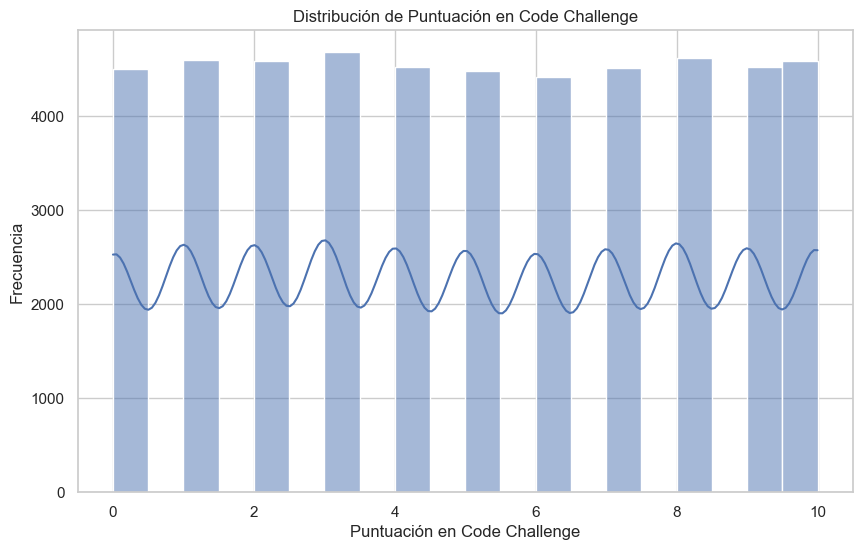

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Code Challenge Score'], bins=20, kde=True)
plt.title('Distribución de Puntuación en Code Challenge')
plt.xlabel('Puntuación en Code Challenge')
plt.ylabel('Frecuencia')
plt.show()


## Distribución de Puntuaciones en Entrevista Técnica


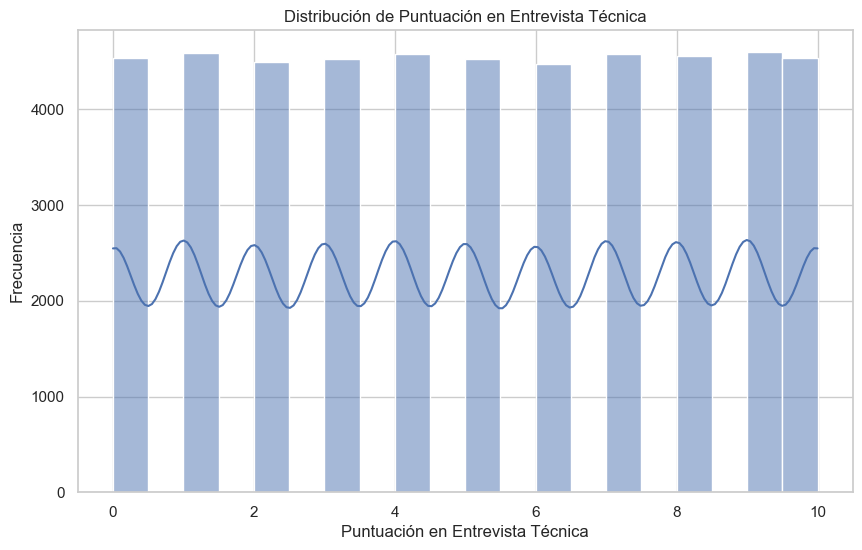

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Technical Interview Score'], bins=20, kde=True)
plt.title('Distribución de Puntuación en Entrevista Técnica')
plt.xlabel('Puntuación en Entrevista Técnica')
plt.ylabel('Frecuencia')
plt.show()


## Análisis de Correlación entre Puntuaciones


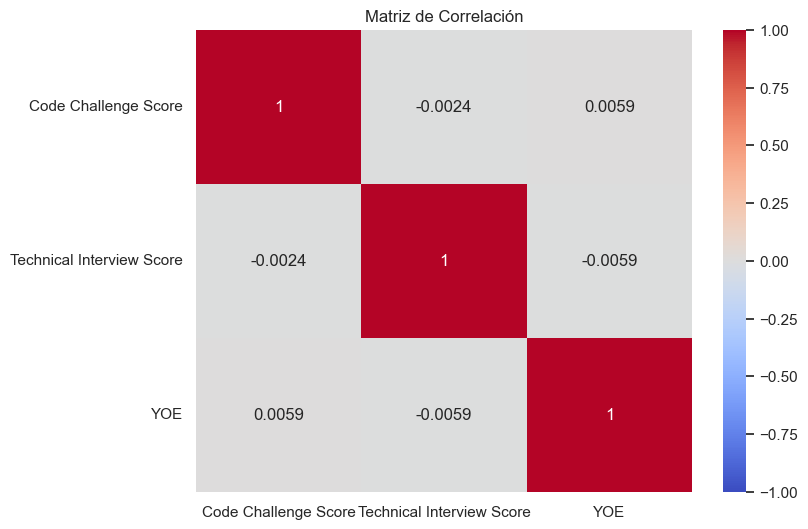

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Code Challenge Score', 'Technical Interview Score', 'YOE']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


## Distribución de Puntuaciones en Code Challenge por País


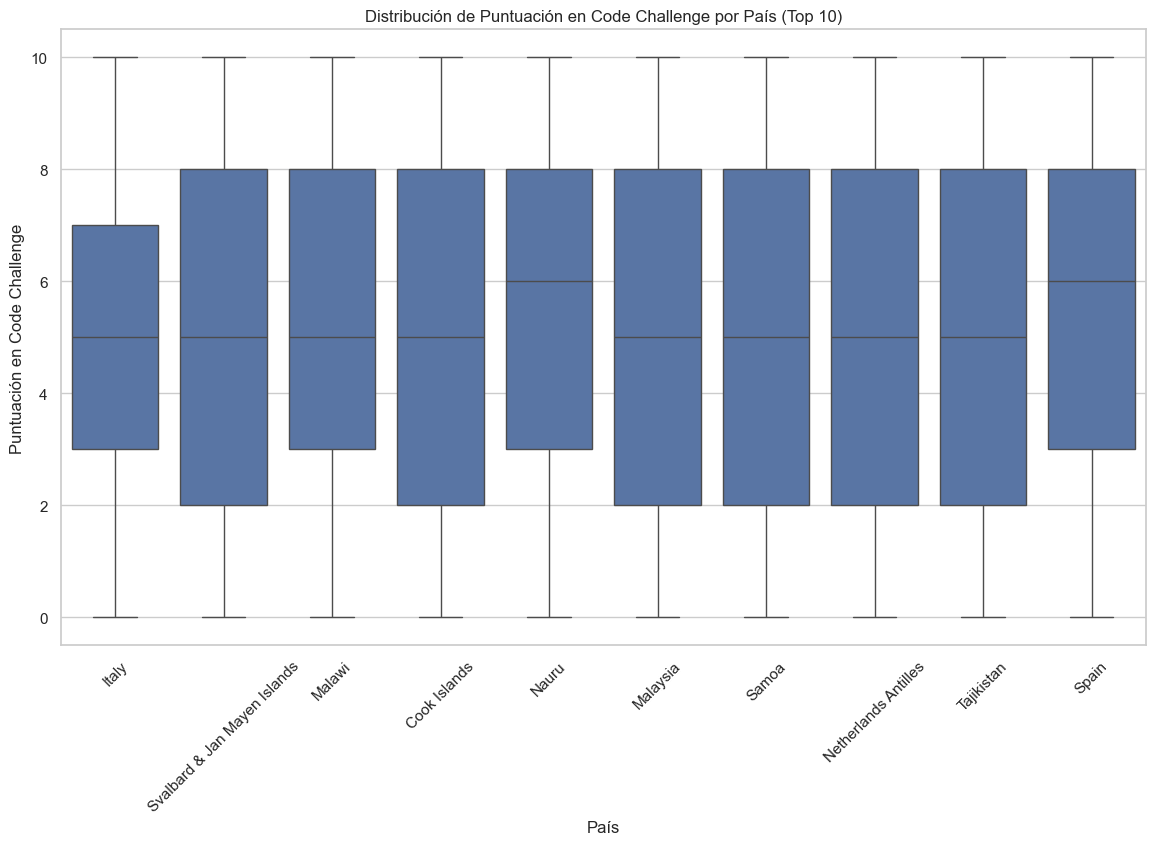

In [22]:
top_countries = df['Country'].value_counts().head(10).index 
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Code Challenge Score', data=df_top_countries)
plt.xticks(rotation=45)
plt.title('Distribución de Puntuación en Code Challenge por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Puntuación en Code Challenge')
plt.show()


## Distribución de Puntuaciones en Code Challenge por Seniority


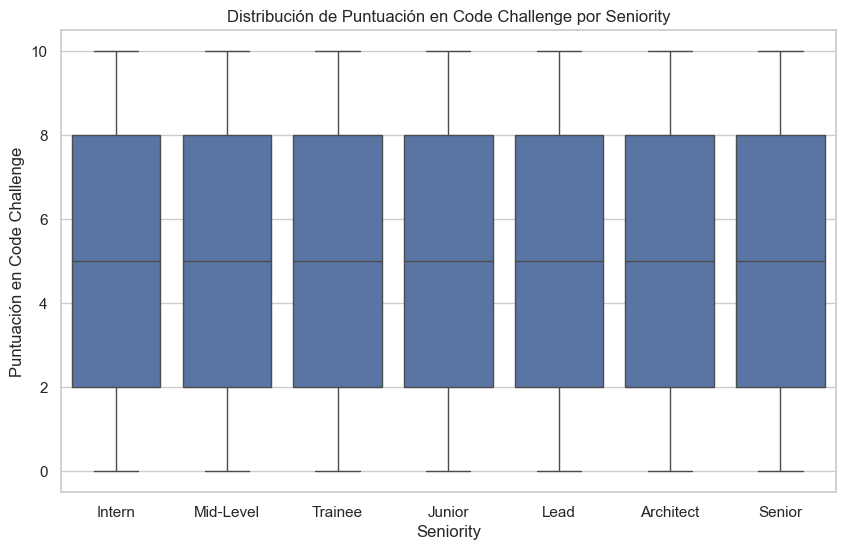

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seniority', y='Code Challenge Score', data=df)
plt.title('Distribución de Puntuación en Code Challenge por Seniority')
plt.xlabel('Seniority')
plt.ylabel('Puntuación en Code Challenge')
plt.show()


##  Definir la lista de países latinos y graficar la evolución del puntaje

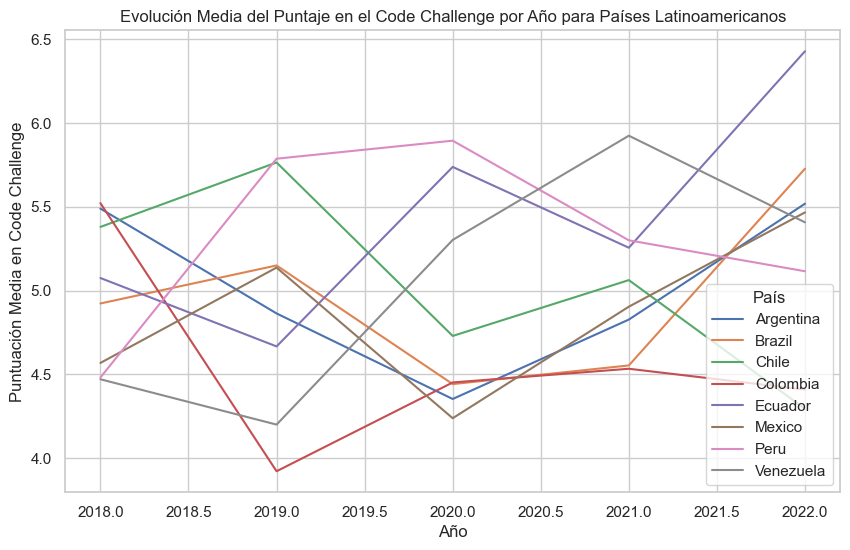

In [28]:
# Definir la lista de países latinos
paises_latinos = ['Brazil', 'Colombia', 'Ecuador', 'Argentina', 'Mexico', 'Chile', 'Peru', 'Venezuela']

# Agrupar por año y país, luego calcular la media del puntaje en el Code Challenge
df['Year'] = pd.to_datetime(df['Application Date']).dt.year
df_latinos = df[df['Country'].isin(paises_latinos)]
mean_scores = df_latinos.groupby(['Year', 'Country'])['Code Challenge Score'].mean().unstack()

plt.figure(figsize=(10, 6))
mean_scores.plot(ax=plt.gca())
plt.title('Evolución Media del Puntaje en el Code Challenge por Año para Países Latinoamericanos')
plt.xlabel('Año')
plt.ylabel('Puntuación Media en Code Challenge')
plt.legend(title='País')
plt.show()


## Evolución del Puntaje en la Entrevista Técnica por Año para Países Latinoamericanos

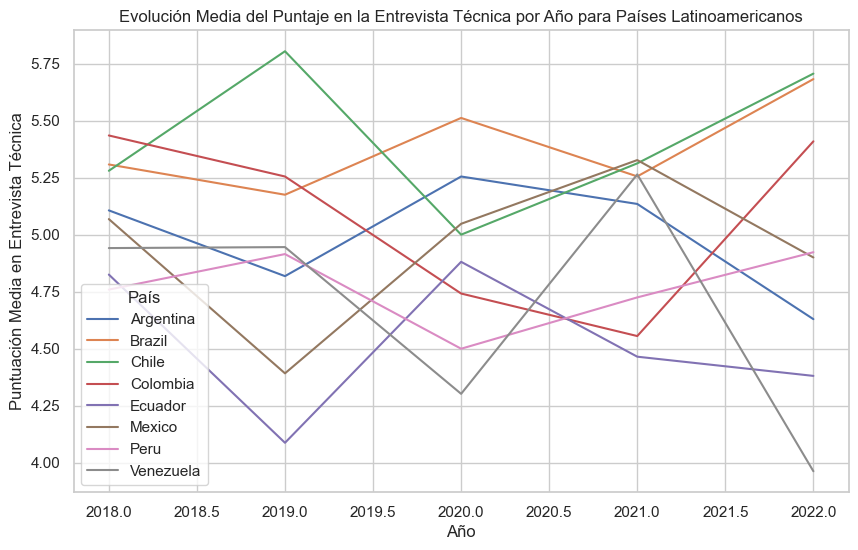

In [30]:
df_latinos = df[df['Country'].isin(paises_latinos)]

# Agrupar por año y país, luego calcular la media del puntaje en la entrevista técnica
mean_scores_technical = df_latinos.groupby(['Year', 'Country'])['Technical Interview Score'].mean().unstack()

plt.figure(figsize=(10, 6))
mean_scores_technical.plot(ax=plt.gca())
plt.title('Evolución Media del Puntaje en la Entrevista Técnica por Año para Países Latinoamericanos')
plt.xlabel('Año')
plt.ylabel('Puntuación Media en Entrevista Técnica')
plt.legend(title='País')
plt.show()

